## Task 1: Introduction

Welcome to this project on how to avoid overfitting with regularization. We will take a look at two types of regularization techniques: weight regularization and dropout regularization.

![Overfitting](images/overfitting.png)


## Task 2: Importing the Data
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework

4423680/4422102 [==============================] - 1s 0us/step


In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


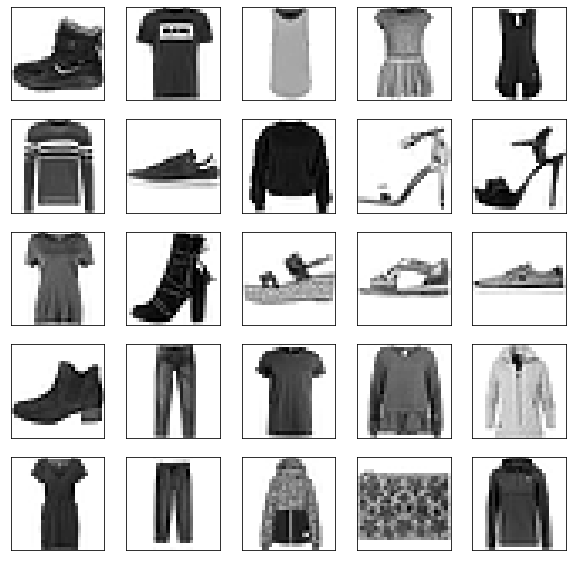

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'binary')
plt.show()

## Task 3: Processing the Data
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___
Original Label: \[5\] is converted to -> One Hot Encoded Label: \[0, 0, 0, 0, 0, 1, 0, 0, 0, 0\]

In [4]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
import numpy as np

x_train = np.reshape(x_train, (60000, 28 * 28))
x_test = np.reshape(x_test, (10000, 28 * 28))

x_train = x_train / 255.
x_test = x_test / 255.

## Task 4: Regularization and Dropout
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

![Neural Network](images/neural_network.png)

#### Dropouts:

![Dropouts](images/dropouts.png)


## Task 5: Creating the Experiment Part 1
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

nodes = 64

def create_model(weight_reg = False, dropout_reg = False):
    model = Sequential()
    if weight_reg:
        model.add(Dense(nodes, activation = 'relu', input_shape = (784,), 
                        kernel_regularizer = l2(0.001)))
        model.add(Dense(nodes, activation = 'relu', kernel_regularizer = l2(0.001)))
    else:
        model.add(Dense(nodes, activation = 'relu', input_shape = (784,)))
        model.add(Dense(nodes, activation = 'relu', input_shape = (784,)))
    if dropout_reg:
        model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
    model.summary()
    return model

## Task 6: Creating the Experiment Part 2
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [7]:
def show_acc(h, E):
    plt.plot(range(E), h.history['acc'], label = 'Training')
    plt.plot(range(E), h.history['val_acc'], label = 'Validation')
    plt.ylim([0.7, 1.0])
    plt.legend()
    plt.show()

In [8]:
from tensorflow.keras.callbacks import LambdaCallback

simple_log = LambdaCallback(on_epoch_end = lambda e,l: print(e, end = '.'))

def run_experiment(E = 20, weight_reg = False, drop_reg = False):
    m = create_model(weight_reg, drop_reg)
    h = m.fit(
        x_train, y_train, 
        epochs = E, 
        validation_data = (x_test, y_test), 
        callbacks = [simple_log], 
        verbose = False
    )
    show_acc(h, E)

## Task 7: Results
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

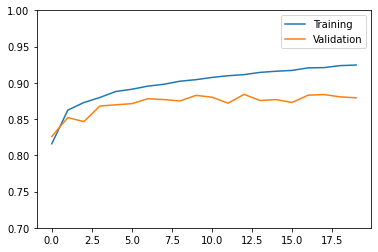

In [9]:
run_experiment()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

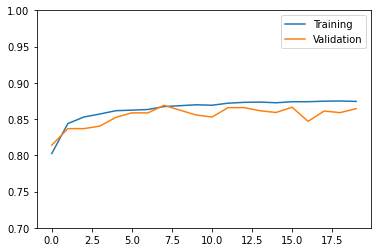

In [10]:
run_experiment(weight_reg = True, drop_reg = True)